In [1517]:
!pip3 install ipympl
!pip install ipyvolume

In [1510]:
import zipfile
import pandas as pd

In [1511]:
with zipfile.ZipFile('data.zip') as zip_ref:
  zip_ref.extractall()

# Data_2d

In [1512]:
df = pd.read_csv("data/data_2d.csv", header=None)

df.head()

,0,1,2
0,0.0,-0.768716,0.460860
1,0.0,2.687848,2.366961
2,0.0,-0.201379,0.470430
3,0.0,0.608496,1.225400
4,0.0,-0.082282,1.137218


## Elbow method

In [1492]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import ipyvolume as ipv
from mpl_toolkits.mplot3d import Axes3D

In [1493]:
def elbow_plot(df):
  distortions = []
  n_clusters = range(1, 11)
  for i in n_clusters:
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init='auto', random_state=0)
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)

  plt.plot(n_clusters, distortions, marker='o')
  plt.title('Elbow Method')
  plt.xlabel('Number of Clusters')
  plt.ylabel('WCSS')
  plt.xticks(n_clusters)

  plt.show()

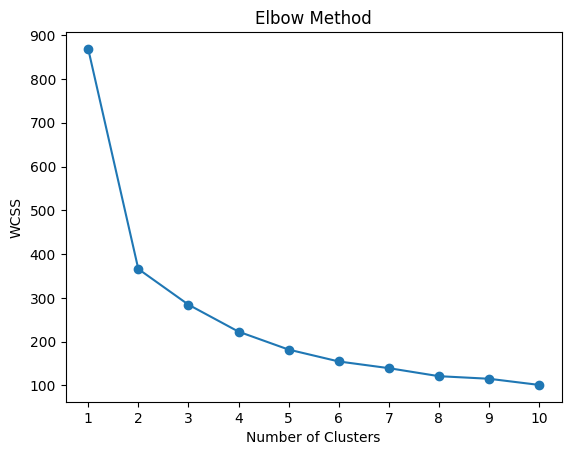

In [1494]:
elbow_plot(df)

The plot shows that optimal k is 2

## Create clusters with K-Means algorithm

In [1496]:
class ClusterHandler3D:
  def __init__(self, df):
    df = df.copy()
    self.origin_data = df

  def fit(self, n_clusters):
    self.n_clusters = n_clusters
    kmeans = KMeans(n_clusters=n_clusters, max_iter=300, init='k-means++', n_init='auto', random_state=0)
    cluster_labels = kmeans.fit_predict(self.origin_data)
    result_df = self.origin_data.copy()
    result_df['cluster'] = cluster_labels

    self.fitted_data = result_df
    return self

  def show(self, elev=30, azim=45):
    fig = ipv.figure(width=800, height=600)
    colors = ['blue', 'red', 'green', 'cyan', 'magenta', 'yellow', 'black']
    if self.n_clusters > len(colors):
      raise ValueError

    for i in range(self.n_clusters):
      cluster_fetch = self.fitted_data[~(self.fitted_data['cluster'] == i)]
      x = cluster_fetch[0]
      y = cluster_fetch[1]
      z = cluster_fetch[2]
      scatter = ipv.scatter(x, y, z, color=colors[i], size=5)

    ipv.show()


In [1497]:
clusters = ClusterHandler3D(df).fit(n_clusters=2)
clusters.show()

Html(layout=None, style_='display: none', tag='span')

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

The clusters was formed not in the best way. And on plot it looks bad. Solution of this problem is to do data normalization. I'll choose MinMaxScaler

## Normalize data

In [1498]:
from sklearn.preprocessing import MinMaxScaler

In [1499]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df))

In [1500]:
clusters = ClusterHandler3D(scaled_df).fit(n_clusters=2)
clusters.show()

Html(layout=None, style_='display: none', tag='span')

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

Now it looks better.

# MNIST

In [1501]:
mnist_df = pd.read_csv("data/mnist.csv", header=None)

display(mnist_df.head())
print(mnist_df.shape)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(500, 785)


Firstly I would like to figure out the optimal feature quantity according to elbow method

## PCA

In [1502]:
import numpy as np
from sklearn.decomposition import PCA

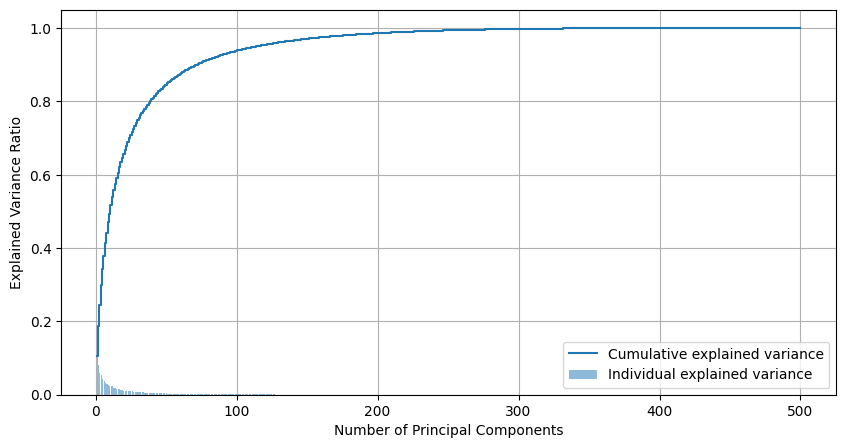

In [1503]:
pca = PCA()
pca.fit(mnist_df)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Cumulative explained variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.grid()
plt.show()


As I understand, this plot shows that optimmal features number is about 75

But in our task we need only 3

In [1504]:
pca = PCA(n_components=3)

mnist_df = pd.DataFrame(pca.fit_transform(mnist_df))

## Normalization

At this time create normalization firstly. At this time, I'll choose Standard scaler

In [1505]:
from sklearn.preprocessing import StandardScaler

In [1506]:
scaler = MinMaxScaler()
mnist_df = pd.DataFrame(scaler.fit_transform(mnist_df))

## Elbow method

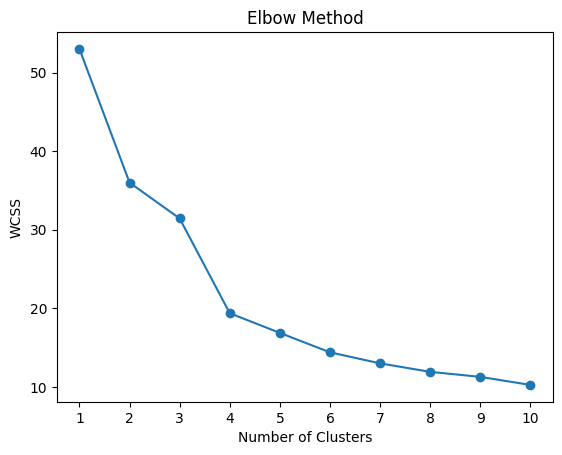

In [1507]:
elbow_plot(mnist_df)

I don't clearly understand which number of clusters is optimal. 3 or 4. Let's assume that 4

# Create clusters with K-Means algorithm

In [1514]:
clusters = ClusterHandler3D(mnist_df).fit(n_clusters=4)
clusters.show()

Html(layout=None, style_='display: none', tag='span')

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

Looks like a porridge